#Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
#mounted drive
from google.colab import drive
#Exsplode
import ast
import json
##visualisasi
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer = pd.read_csv('drive/MyDrive/Dataset-Capstone/customer.csv')
product = pd.read_csv('drive/MyDrive/Dataset-Capstone/product.csv', on_bad_lines='skip')
transactions = pd.read_csv('drive/MyDrive/Dataset-Capstone/transactions.csv')
# stream = pd.read_csv('drive/MyDrive/Dataset-Capstone/click_stream.csv')

## Data Transaction

In [ ]:
transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


###Exsplode Kolom metadata

In [ ]:
##EXPLODE
transactions['product_metadata'] = transactions['product_metadata'].astype('string')

#apply literal eval function
transactions['product_metadata'] = transactions['product_metadata'].map(lambda x: ast.literal_eval(x))

#explode data
transactions = transactions.explode('product_metadata')

#reset_index, karena penambahan row data(efek dari explode)
transactions.reset_index(inplace = True)

#drop index column, karena ada index baru
transactions.drop('index', axis=1, inplace = True)

#menggunakan function json_normalize untuk mensplit dict data
metadata_split =  pd.json_normalize(transactions['product_metadata'])
metadata_split

,product_id,quantity,item_price
0,54728,1,191247
1,16193,1,145526
2,53686,4,135174
3,20228,1,271012
4,55220,1,198753
...,...,...,...
1254580,30642,2,113410
1254581,19394,1,354213
1254582,13079,4,288835
1254583,11312,1,188646


In [ ]:
productmetadata = pd.DataFrame(metadata_split)
# Gabungkan kolom-kolom baru ke dalam DataFrame transactions
transactions = pd.concat([transactions, productmetadata], axis=1)
# Hapus kolom 'product_metadata' jika tidak diperlukan lagi
transactions.drop(columns=['product_metadata'], inplace=True)

In [ ]:
transactions.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


### Ubah tipedata

In [ ]:
# ubah tipedata
transactions['created_at']= pd.to_datetime(transactions['created_at'])
transactions['shipment_date_limit']= pd.to_datetime(transactions['shipment_date_limit'])

###missing value

In [ ]:
#check missing value
def missing_check(transactions):
    missing= transactions.isnull().sum()
    per_mis = 100*(missing/len(transactions))
    data_type = transactions.dtypes
    number_unique = transactions.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(transactions)

,Missing,Percent_Missing,Data_Types,Number_Unique
created_at,0,0.000000,"datetime64[ns, UTC]",852584
customer_id,0,0.000000,int64,50705
booking_id,0,0.000000,object,852584
session_id,0,0.000000,object,852584
payment_method,0,0.000000,object,5
payment_status,0,0.000000,object,2
promo_amount,0,0.000000,int64,15180
promo_code,773446,61.649549,object,8
shipment_fee,0,0.000000,int64,6
shipment_date_limit,0,0.000000,"datetime64[ns, UTC]",852584


In [ ]:
# handling missing value pada kode promo
## missing value pada promo code terjadi karena memang tidak ada kode promo nyang digunakan saat transaksi
##maka handlingnya di ganti dengan 0
transactions['promo_code'].fillna('0', inplace=True)

In [ ]:
#check lagi missing value
transactions.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
dtype: int64

In [ ]:
transactions

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,0,0,2021-09-27 00:43:40.992167+00:00,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,-7.155977,110.891858,184143,11312,1,188646


###outlier

In [ ]:
#menentukan outlier dengan cara satatistiqal IQR
#Dimana Outlier akan terdeteksi pada saat values Q1–1,5 IQR atau di atas Q3 + 1,5 IQR
def find_outliers_IQR(transactions):
    Q1 = transactions.quantile(0.25)
    Q3 = transactions.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (transactions < lower_bound) | (transactions > upper_bound)
    return outliers

# Memilih kolom-kolom numerik dalam DataFrame transactions
numerical_columns = transactions.select_dtypes(include=['int', 'float'])
# Mencari outlier dalam kolom-kolom numerik menggunakan IQR
outliers = find_outliers_IQR(numerical_columns)

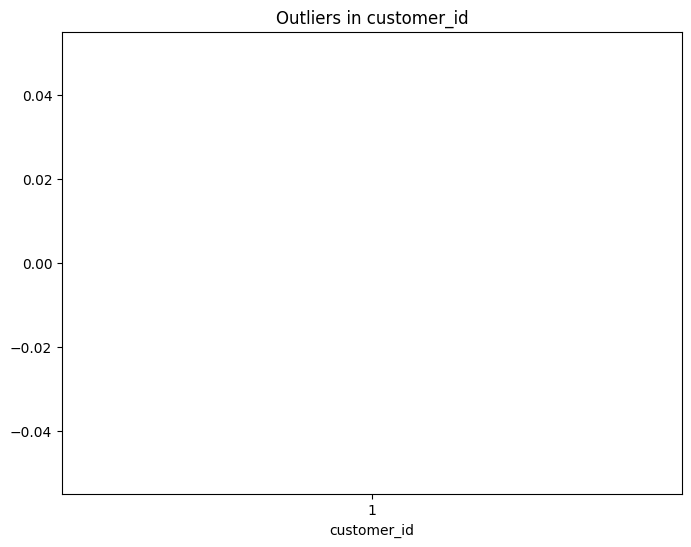

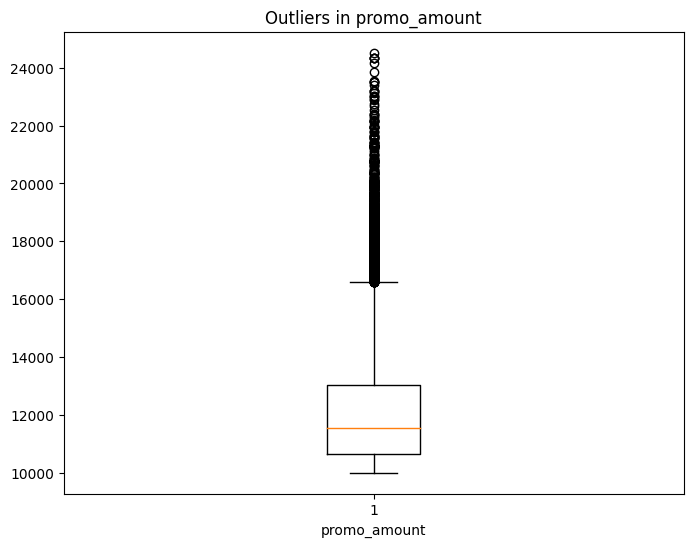

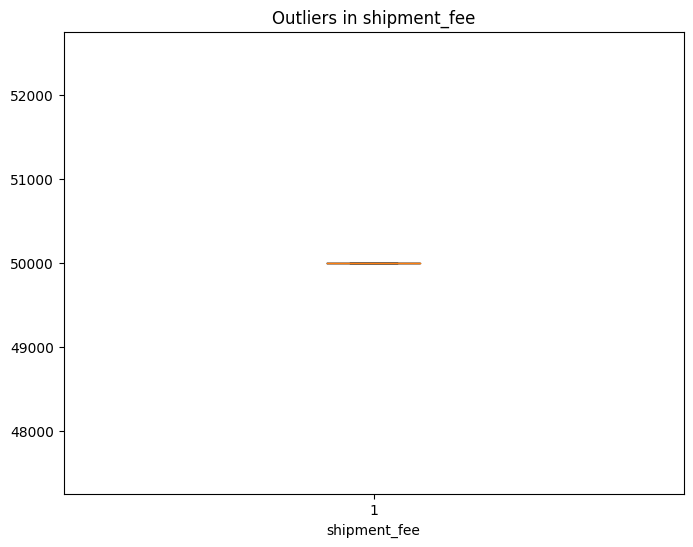

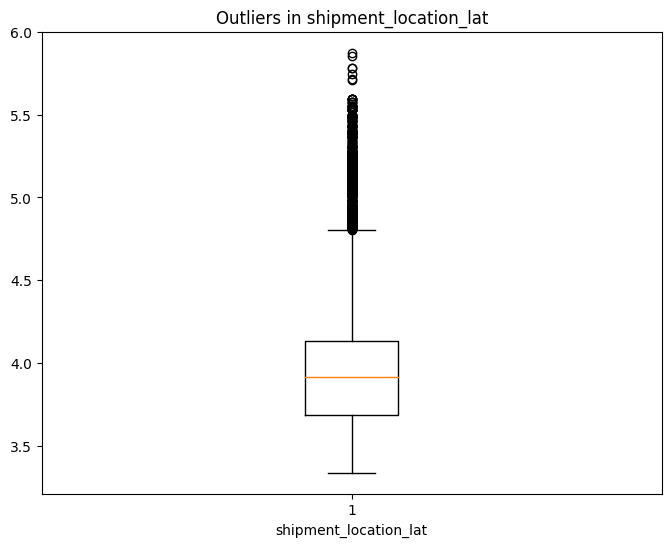

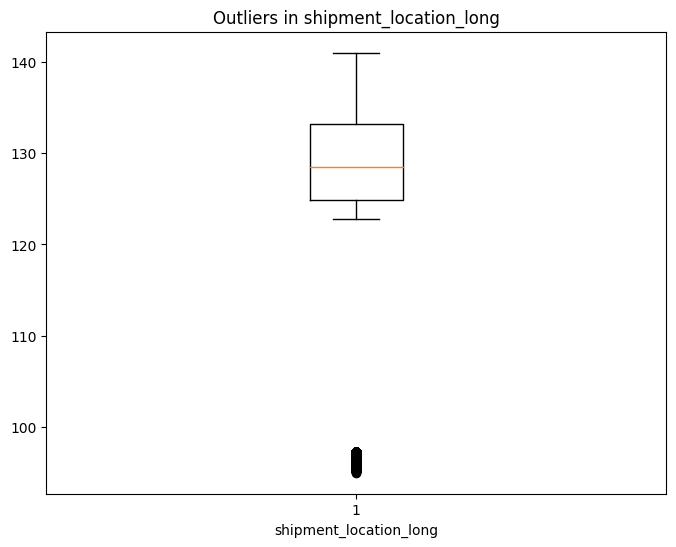

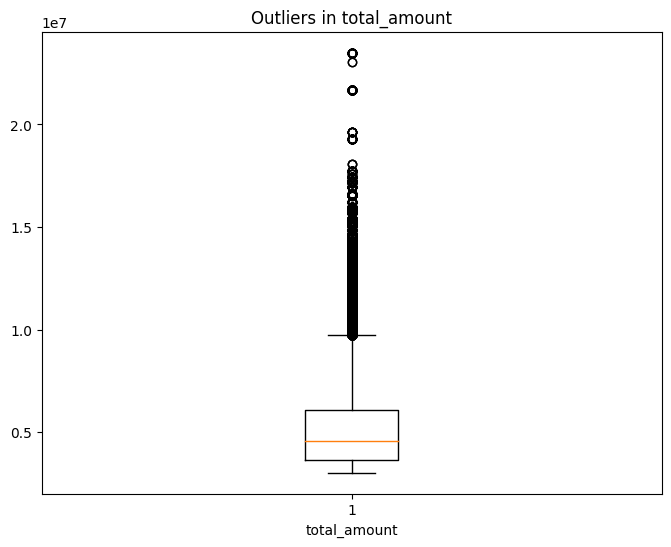

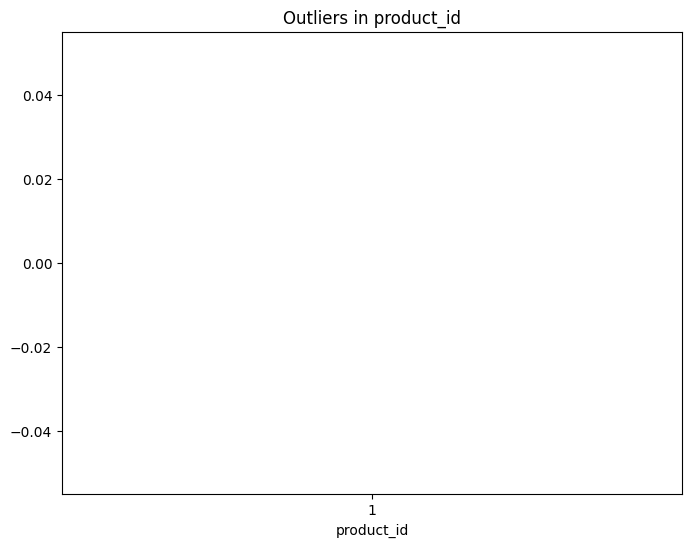

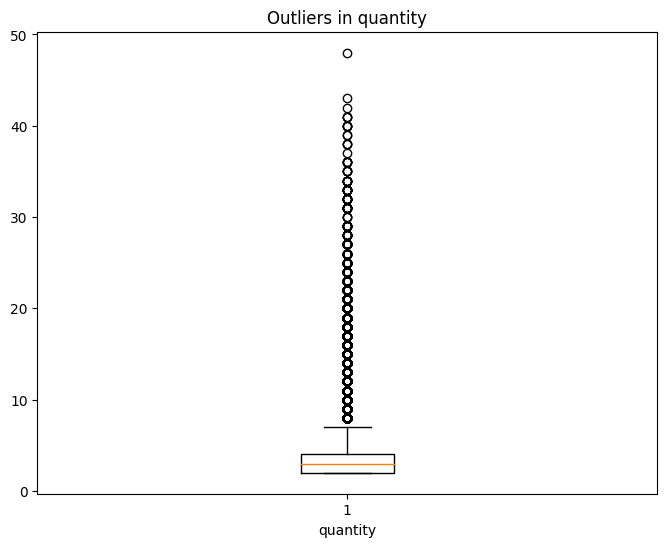

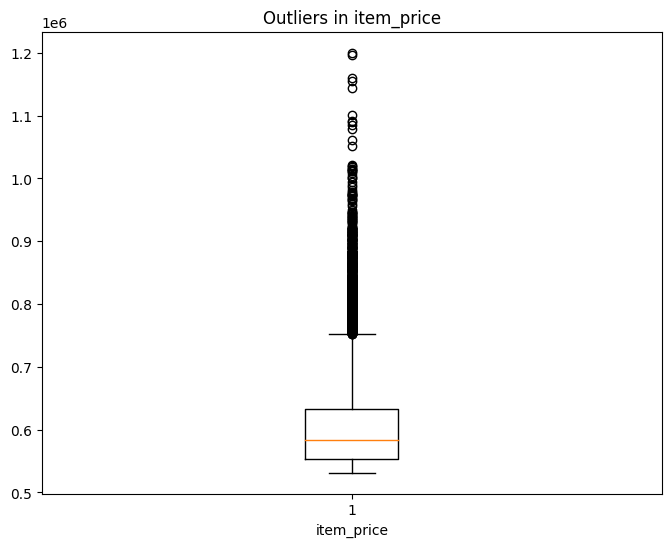

In [ ]:
import matplotlib.pyplot as plt

# Memilih kolom-kolom numerik dalam DataFrame transactions
numerical_columns = transactions.select_dtypes(include=['int', 'float'])

# Menggambar plot untuk setiap kolom numerik dengan outlier
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(transactions[column][outliers[column]])
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.show()

Outlier tidak dihadling secara langsung dengan alasan sebagai berikut :<br>
1. Pada kolom quantity tidak di handling outlier karena untuk menjaga keaslian frequensi pembelian product. dan kolom ini juga akan sangat memepengaruhi kolom total_amout
2. total amount tidak dihandling secara langsung, karena ada rumus untuk menentukan isi kolom ini, untuk halingnya terdapat pada Feature Enginer dengan menerapkan rumus tersebut.
3. price_item tidak dihaling karena untuk menjaga harga asli barang dari toko ini..takutnya kalo di adjust atau normalize malahh jadi rancuu
4. promo_amount tidak dihanling karena memang promo yang diberikan oleh toko ini berkisar antara 10rb-25 rb

### duplicated

In [ ]:
 transactions[transactions.duplicated()]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price


##Dataset Product

In [ ]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
product[product['productDisplayName'].duplicated()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
186,21948,Women,Accessories,Bags,Handbags,Brown,Winter,2015.0,Casual,Murcia Women Casual Brown Handbag
230,45603,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2012.0,Formal,Arrow Men Black Formal Shoes
349,41861,Men,Footwear,Sandal,Sandals,Black,Summer,2016.0,Casual,Estd. 1977 Men Black Sandals
373,58726,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
392,16950,Men,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Image Men Sunglasses
...,...,...,...,...,...,...,...,...,...,...
44405,37431,Women,Accessories,Bags,Handbags,Black,Summer,2012.0,Casual,Murcia Women Black Handbag
44410,38479,Boys,Apparel,Topwear,Tshirts,Green,Summer,2012.0,Casual,Gini and Jony Boys Core Green T-shirt
44411,33091,Women,Footwear,Shoes,Heels,Gold,Winter,2015.0,Casual,Catwalk Women Gold Flats
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top


In [ ]:
#memilih kolom untuk profileing product
products = product[['id','masterCategory','productDisplayName','subCategory','gender','articleType','season']]

In [ ]:
#check missing value
def missing_check(products):
    missing= products.isnull().sum()
    per_mis = 100*(missing/len(products))
    data_type = products.dtypes
    number_unique = products.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(products)

,Missing,Percent_Missing,Data_Types,Number_Unique
id,0,0.000000,int64,44424
masterCategory,0,0.000000,object,7
productDisplayName,7,0.015757,object,31121
subCategory,0,0.000000,object,45
gender,0,0.000000,object,5
articleType,0,0.000000,object,143
season,21,0.047272,object,4


### missing Value

In [ ]:
#hadling missing value nameproduct
# mengisi display name yang kosong dengn cara mengambil mode nama dari sub category si product
products['productDisplayName'] = products.groupby('subCategory')['productDisplayName'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None))

<ipython-input-25-0fa0646ef2dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['productDisplayName'] = products.groupby('subCategory')['productDisplayName'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None))


In [ ]:
##mengisi seson yang kosong dengan mode
modeseason = products['season'].mode().values[0]
products['season'].fillna(modeseason, inplace=True)

<ipython-input-26-816c9496d575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['season'].fillna(modeseason, inplace=True)


In [ ]:
products.isnull().sum()

id                    0
masterCategory        0
productDisplayName    0
subCategory           0
gender                0
articleType           0
season                0
dtype: int64

In [ ]:
products

,id,masterCategory,productDisplayName,subCategory,gender,articleType,season
0,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall
1,39386,Apparel,Peter England Men Party Blue Jeans,Bottomwear,Men,Jeans,Summer
2,59263,Accessories,Titan Women Silver Watch,Watches,Women,Watches,Winter
3,21379,Apparel,Manchester United Men Solid Black Track Pants,Bottomwear,Men,Track Pants,Fall
4,53759,Apparel,Puma Men Grey T-shirt,Topwear,Men,Tshirts,Summer
...,...,...,...,...,...,...,...
44419,17036,Footwear,Gas Men Caddy Casual Shoe,Shoes,Men,Casual Shoes,Summer
44420,6461,Footwear,Lotto Men's Soccer Track Flip Flop,Flip Flops,Men,Flip Flops,Summer
44421,18842,Apparel,Puma Men Graphic Stellar Blue Tshirt,Topwear,Men,Tshirts,Fall
44422,46694,Personal Care,Rasasi Women Blue Lady Perfume,Fragrance,Women,Perfume and Body Mist,Spring


### Outlier
tidakn melakukan outlier karena dataset product yang diambil hanya kolom kolom yang memberikan informasi lebih tentang product dari id product, seperti display name, category,etc

### Duplicated

In [ ]:
 product[product.duplicated()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName


##Marge product and Transactions

In [ ]:
df = products.merge(transactions, right_on='product_id' , left_on='id',how='inner')

In [ ]:
pd.DataFrame(df)
#check missing value
def missing_check(df):
    missing= df.isnull().sum()
    per_mis = 100*(missing/len(df))
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_Unique
id,0,0.0,int64,44424
masterCategory,0,0.0,object,7
productDisplayName,0,0.0,object,31121
subCategory,0,0.0,object,45
gender,0,0.0,object,5
articleType,0,0.0,object,143
season,0,0.0,object,4
created_at,0,0.0,"datetime64[ns, UTC]",852229
customer_id,0,0.0,int64,50700
booking_id,0,0.0,object,852229


In [ ]:
df

,id,masterCategory,productDisplayName,subCategory,gender,articleType,season,created_at,customer_id,booking_id,...,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall,2019-07-04 09:43:04.691523+00:00,58112,5af40e2d-34cb-4180-b570-aacb7ae5f06a,...,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,-6.237364,106.877871,1193586,15970,1,172361
1,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall,2021-10-18 02:42:44.802978+00:00,71232,8723e324-1530-484e-88b6-a9d85f8dd13b,...,0,0,0,2021-10-22 05:15:24.465084+00:00,-8.142204,112.745038,7218361,15970,3,256822
2,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall,2020-07-06 01:05:31.917477+00:00,59815,9b40b96a-3bbd-4162-97d4-ac15c66a2496,...,0,0,10000,2020-07-11 22:31:25.004940+00:00,-6.320214,106.813790,690544,15970,1,680544
3,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall,2021-07-19 19:08:21.678312+00:00,85744,c9fe45d3-0918-4aeb-b4bb-f63dee829620,...,4505,AZ2022,50000,2021-07-21 17:21:48.092705+00:00,0.118684,111.945939,605587,15970,1,560092
4,15970,Apparel,Turtle Check Men Navy Blue Shirt,Topwear,Men,Shirts,Fall,2022-05-25 04:44:49.224091+00:00,75395,78508475-048e-40aa-afbf-57f7fdb8c6e3,...,0,0,10000,2022-05-26 23:05:18.501133+00:00,-6.939572,107.075386,415826,15970,1,135930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,51623,Accessories,Fossil Women Pink Dial Chronograph Watch ES3050,Watches,Women,Watches,Winter,2022-01-04 13:40:28.429573+00:00,39451,ffd15f6c-f5b4-4c60-9321-f5ae25433c5c,...,3386,AZ2022,0,2022-01-09 19:14:22.328976+00:00,-8.000597,111.405293,1244219,51623,5,249521
1253962,51623,Accessories,Fossil Women Pink Dial Chronograph Watch ES3050,Watches,Women,Watches,Winter,2020-03-05 10:09:03.345710+00:00,68573,70ece3ed-f300-46b7-9331-d30ecf7c5600,...,7036,XX2022,10000,2020-03-07 06:30:10.321333+00:00,-1.411202,103.761191,1049731,51623,3,200490
1253963,51623,Accessories,Fossil Women Pink Dial Chronograph Watch ES3050,Watches,Women,Watches,Winter,2021-09-29 13:12:32.617351+00:00,91047,87ff1b49-6488-4c06-aa99-442c8907547d,...,0,0,15000,2021-10-04 06:50:35.649465+00:00,-6.198870,106.854615,814466,51623,1,482029
1253964,51623,Accessories,Fossil Women Pink Dial Chronograph Watch ES3050,Watches,Women,Watches,Winter,2022-05-24 13:17:29.582107+00:00,35902,ea61ce65-cb5b-41ca-84c3-7743f38cd168,...,0,0,10000,2022-05-29 03:44:31.005987+00:00,0.828470,124.163638,302576,51623,1,292576


## Feature Enginer

In [ ]:
#memilih kolom yang akan digunkan untuk profiling
df_success = df[['customer_id','productDisplayName','masterCategory', 'product_id', 'created_at', 'season', 'payment_method', 'payment_status', 'promo_amount', 'promo_code', 'shipment_fee', 'shipment_date_limit', 'quantity', 'item_price', 'total_amount']]
df_success = df_success[df_success['payment_status'] == 'Success']

In [ ]:
## rumus untuk mengetahui total amount
df_success ['real_total_amount'] = (df_success['shipment_fee']  + df_success['item_price'] * df_success['quantity'] ) - df_success['promo_amount']

<ipython-input-34-88ceaae431ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success ['real_total_amount'] = (df_success['shipment_fee']  + df_success['item_price'] * df_success['quantity'] ) - df_success['promo_amount']


In [ ]:
df_success

,customer_id,productDisplayName,masterCategory,product_id,created_at,season,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,quantity,item_price,total_amount,real_total_amount
0,58112,Turtle Check Men Navy Blue Shirt,Apparel,15970,2019-07-04 09:43:04.691523+00:00,Fall,Debit Card,Success,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,1,172361,1193586,168750
1,71232,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-10-18 02:42:44.802978+00:00,Fall,OVO,Success,0,0,0,2021-10-22 05:15:24.465084+00:00,3,256822,7218361,770466
2,59815,Turtle Check Men Navy Blue Shirt,Apparel,15970,2020-07-06 01:05:31.917477+00:00,Fall,Credit Card,Success,0,0,10000,2020-07-11 22:31:25.004940+00:00,1,680544,690544,690544
3,85744,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-07-19 19:08:21.678312+00:00,Fall,OVO,Success,4505,AZ2022,50000,2021-07-21 17:21:48.092705+00:00,1,560092,605587,605587
4,75395,Turtle Check Men Navy Blue Shirt,Apparel,15970,2022-05-25 04:44:49.224091+00:00,Fall,LinkAja,Success,0,0,10000,2022-05-26 23:05:18.501133+00:00,1,135930,415826,145930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,39451,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-01-04 13:40:28.429573+00:00,Winter,Credit Card,Success,3386,AZ2022,0,2022-01-09 19:14:22.328976+00:00,5,249521,1244219,1244219
1253962,68573,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2020-03-05 10:09:03.345710+00:00,Winter,Credit Card,Success,7036,XX2022,10000,2020-03-07 06:30:10.321333+00:00,3,200490,1049731,604434
1253963,91047,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2021-09-29 13:12:32.617351+00:00,Winter,Debit Card,Success,0,0,15000,2021-10-04 06:50:35.649465+00:00,1,482029,814466,497029
1253964,35902,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-05-24 13:17:29.582107+00:00,Winter,Credit Card,Success,0,0,10000,2022-05-29 03:44:31.005987+00:00,1,292576,302576,302576


In [ ]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200444 entries, 0 to 1253965
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   customer_id          1200444 non-null  int64              
 1   productDisplayName   1200444 non-null  object             
 2   masterCategory       1200444 non-null  object             
 3   product_id           1200444 non-null  int64              
 4   created_at           1200444 non-null  datetime64[ns, UTC]
 5   season               1200444 non-null  object             
 6   payment_method       1200444 non-null  object             
 7   payment_status       1200444 non-null  object             
 8   promo_amount         1200444 non-null  int64              
 9   promo_code           1200444 non-null  object             
 10  shipment_fee         1200444 non-null  int64              
 11  shipment_date_limit  1200444 non-null  datetime64[

In [ ]:
def cektotal(row):
  if row['total_amount'] == row['real_total_amount']:
     return 'sama'
  else:
    return 'tidak sama'
cek_total_amount = df_success.apply(cektotal,axis=1)

In [ ]:
pd.DataFrame(cek_total_amount).value_counts()

sama          675968
tidak sama    524476
dtype: int64

In [ ]:
## karena lama harus ngefilter dalm pembenaran total amount maka dari itu kolom total_amout dihapus
# digantikan dengan kolom real_total_amount
df_success.drop(['total_amount'],axis=1, inplace=True)

In [ ]:
df_success

,customer_id,productDisplayName,masterCategory,product_id,created_at,season,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,quantity,item_price,real_total_amount
0,58112,Turtle Check Men Navy Blue Shirt,Apparel,15970,2019-07-04 09:43:04.691523+00:00,Fall,Debit Card,Success,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,1,172361,168750
1,71232,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-10-18 02:42:44.802978+00:00,Fall,OVO,Success,0,0,0,2021-10-22 05:15:24.465084+00:00,3,256822,770466
2,59815,Turtle Check Men Navy Blue Shirt,Apparel,15970,2020-07-06 01:05:31.917477+00:00,Fall,Credit Card,Success,0,0,10000,2020-07-11 22:31:25.004940+00:00,1,680544,690544
3,85744,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-07-19 19:08:21.678312+00:00,Fall,OVO,Success,4505,AZ2022,50000,2021-07-21 17:21:48.092705+00:00,1,560092,605587
4,75395,Turtle Check Men Navy Blue Shirt,Apparel,15970,2022-05-25 04:44:49.224091+00:00,Fall,LinkAja,Success,0,0,10000,2022-05-26 23:05:18.501133+00:00,1,135930,145930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,39451,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-01-04 13:40:28.429573+00:00,Winter,Credit Card,Success,3386,AZ2022,0,2022-01-09 19:14:22.328976+00:00,5,249521,1244219
1253962,68573,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2020-03-05 10:09:03.345710+00:00,Winter,Credit Card,Success,7036,XX2022,10000,2020-03-07 06:30:10.321333+00:00,3,200490,604434
1253963,91047,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2021-09-29 13:12:32.617351+00:00,Winter,Debit Card,Success,0,0,15000,2021-10-04 06:50:35.649465+00:00,1,482029,497029
1253964,35902,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-05-24 13:17:29.582107+00:00,Winter,Credit Card,Success,0,0,10000,2022-05-29 03:44:31.005987+00:00,1,292576,302576


In [ ]:
## membuat feature yang bertujuan untuk mengetahui lama pengantaran barang dari awal transaksi sampai barang datang
df_success['pacing_long'] = df_success['shipment_date_limit'].dt.dayofyear - df_success['created_at'].dt.dayofyear

In [ ]:
df_success

,customer_id,productDisplayName,masterCategory,product_id,created_at,season,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,quantity,item_price,real_total_amount,pacing_long
0,58112,Turtle Check Men Navy Blue Shirt,Apparel,15970,2019-07-04 09:43:04.691523+00:00,Fall,Debit Card,Success,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,1,172361,168750,5
1,71232,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-10-18 02:42:44.802978+00:00,Fall,OVO,Success,0,0,0,2021-10-22 05:15:24.465084+00:00,3,256822,770466,4
2,59815,Turtle Check Men Navy Blue Shirt,Apparel,15970,2020-07-06 01:05:31.917477+00:00,Fall,Credit Card,Success,0,0,10000,2020-07-11 22:31:25.004940+00:00,1,680544,690544,5
3,85744,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-07-19 19:08:21.678312+00:00,Fall,OVO,Success,4505,AZ2022,50000,2021-07-21 17:21:48.092705+00:00,1,560092,605587,2
4,75395,Turtle Check Men Navy Blue Shirt,Apparel,15970,2022-05-25 04:44:49.224091+00:00,Fall,LinkAja,Success,0,0,10000,2022-05-26 23:05:18.501133+00:00,1,135930,145930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,39451,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-01-04 13:40:28.429573+00:00,Winter,Credit Card,Success,3386,AZ2022,0,2022-01-09 19:14:22.328976+00:00,5,249521,1244219,5
1253962,68573,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2020-03-05 10:09:03.345710+00:00,Winter,Credit Card,Success,7036,XX2022,10000,2020-03-07 06:30:10.321333+00:00,3,200490,604434,2
1253963,91047,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2021-09-29 13:12:32.617351+00:00,Winter,Debit Card,Success,0,0,15000,2021-10-04 06:50:35.649465+00:00,1,482029,497029,5
1253964,35902,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-05-24 13:17:29.582107+00:00,Winter,Credit Card,Success,0,0,10000,2022-05-29 03:44:31.005987+00:00,1,292576,302576,5


In [ ]:
## ini hanya penambahan data untuk mengambil location yang digunakan untuk keperluan visualisasi power BI
to_tempat = df_success.copy()

In [ ]:
to_tempat

,customer_id,productDisplayName,masterCategory,product_id,created_at,season,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,quantity,item_price,real_total_amount,pacing_long
0,58112,Turtle Check Men Navy Blue Shirt,Apparel,15970,2019-07-04 09:43:04.691523+00:00,Fall,Debit Card,Success,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,1,172361,168750,5
1,71232,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-10-18 02:42:44.802978+00:00,Fall,OVO,Success,0,0,0,2021-10-22 05:15:24.465084+00:00,3,256822,770466,4
2,59815,Turtle Check Men Navy Blue Shirt,Apparel,15970,2020-07-06 01:05:31.917477+00:00,Fall,Credit Card,Success,0,0,10000,2020-07-11 22:31:25.004940+00:00,1,680544,690544,5
3,85744,Turtle Check Men Navy Blue Shirt,Apparel,15970,2021-07-19 19:08:21.678312+00:00,Fall,OVO,Success,4505,AZ2022,50000,2021-07-21 17:21:48.092705+00:00,1,560092,605587,2
4,75395,Turtle Check Men Navy Blue Shirt,Apparel,15970,2022-05-25 04:44:49.224091+00:00,Fall,LinkAja,Success,0,0,10000,2022-05-26 23:05:18.501133+00:00,1,135930,145930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,39451,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-01-04 13:40:28.429573+00:00,Winter,Credit Card,Success,3386,AZ2022,0,2022-01-09 19:14:22.328976+00:00,5,249521,1244219,5
1253962,68573,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2020-03-05 10:09:03.345710+00:00,Winter,Credit Card,Success,7036,XX2022,10000,2020-03-07 06:30:10.321333+00:00,3,200490,604434,2
1253963,91047,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2021-09-29 13:12:32.617351+00:00,Winter,Debit Card,Success,0,0,15000,2021-10-04 06:50:35.649465+00:00,1,482029,497029,5
1253964,35902,Fossil Women Pink Dial Chronograph Watch ES3050,Accessories,51623,2022-05-24 13:17:29.582107+00:00,Winter,Credit Card,Success,0,0,10000,2022-05-29 03:44:31.005987+00:00,1,292576,302576,5


In [ ]:
customer = customer [['customer_id','home_location_lat','home_location_long','home_location']]

In [ ]:
customer

,customer_id,home_location_lat,home_location_long,home_location
0,2870,-1.043345,101.360523,Sumatera Barat
1,8193,-6.212489,106.818850,Jakarta Raya
2,7279,-8.631607,116.428436,Nusa Tenggara Barat
3,88813,1.299332,115.774934,Kalimantan Timur
4,82542,-2.980807,114.924675,Kalimantan Selatan
...,...,...,...,...
99995,34743,-5.203523,105.635530,Lampung
99996,72065,4.474702,95.904876,Aceh
99997,32818,-3.330376,127.028348,Maluku
99998,75597,-2.173114,101.495913,Jambi


In [ ]:
df_success_final = to_tempat.merge(customer, on='customer_id',how='inner')

In [ ]:
df_success_final

,customer_id,productDisplayName,masterCategory,product_id,created_at,season,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,quantity,item_price,real_total_amount,pacing_long,home_location_lat,home_location_long,home_location
0,58112,Turtle Check Men Navy Blue Shirt,Apparel,15970,2019-07-04 09:43:04.691523+00:00,Fall,Debit Card,Success,3611,AZ2022,0,2019-07-09 10:56:42.849401+00:00,1,172361,168750,5,-6.237364,106.877871,Jakarta Raya
1,58112,Fastrack Men Black Watch,Accessories,43164,2021-02-03 20:51:59.691523+00:00,Winter,Credit Card,Success,0,0,10000,2021-02-05 08:19:45.521070+00:00,1,218632,228632,2,-6.237364,106.877871,Jakarta Raya
2,58112,Scullers Men Check Red Shirts,Apparel,13879,2019-10-12 11:39:49.691523+00:00,Fall,Credit Card,Success,5374,WEEKENDSERU,0,2019-10-17 17:54:11.655783+00:00,1,346872,341498,5,-6.237364,106.877871,Jakarta Raya
3,58112,Murcia Women Purple Handbag,Accessories,27685,2022-02-19 00:16:39.691523+00:00,Winter,Credit Card,Success,0,0,10000,2022-02-24 17:15:23.870442+00:00,1,294559,304559,5,-6.237364,106.877871,Jakarta Raya
4,58112,John Miller Men Check Orange Shirt,Apparel,31142,2018-09-07 04:05:24.691523+00:00,Summer,Credit Card,Success,0,0,10000,2018-09-09 14:08:45.577050+00:00,1,189110,199110,2,-6.237364,106.877871,Jakarta Raya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200439,1070,Murcia Women Black Handbag,Accessories,37431,2021-07-12 06:47:52.603694+00:00,Summer,Credit Card,Success,0,0,10000,2021-07-13 18:43:48.396884+00:00,1,149687,159687,1,-0.652039,132.082530,Papua Barat
1200440,63665,Gini and Jony Boys Core Green T-shirt,Apparel,38479,2022-07-30 13:20:07.301070+00:00,Summer,Credit Card,Success,5167,WEEKENDSERU,50000,2022-08-02 04:30:52.711558+00:00,1,170088,214921,3,-4.139412,105.592189,Lampung
1200441,994,Catwalk Women Gold Flats,Footwear,33091,2021-07-10 00:46:54.155258+00:00,Winter,OVO,Success,5462,WEEKENDSERU,0,2021-07-11 09:17:38.882317+00:00,1,194821,189359,1,-7.434039,110.780403,Jawa Tengah
1200442,29150,Lakme Absolute Cheek Chromatic Day Blushes Blu...,Personal Care,55283,2019-08-18 05:34:45.323613+00:00,Spring,Debit Card,Success,0,0,10000,2019-08-19 17:43:04.034106+00:00,1,343235,353235,1,-6.212625,106.932227,Jakarta Raya


In [ ]:
# from google.colab import files
# #mendownload df jsuccess visualisasi
# df_success_final.to_csv('df_success_final.csv', index=False)
# files.download('df_success_final.csv')

# EDA

In [ ]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200444 entries, 0 to 1253965
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   customer_id          1200444 non-null  int64              
 1   productDisplayName   1200444 non-null  object             
 2   masterCategory       1200444 non-null  object             
 3   product_id           1200444 non-null  int64              
 4   created_at           1200444 non-null  datetime64[ns, UTC]
 5   season               1200444 non-null  object             
 6   payment_method       1200444 non-null  object             
 7   payment_status       1200444 non-null  object             
 8   promo_amount         1200444 non-null  int64              
 9   promo_code           1200444 non-null  object             
 10  shipment_fee         1200444 non-null  int64              
 11  shipment_date_limit  1200444 non-null  datetime64[

In [ ]:
df_success.describe()

,customer_id,product_id,promo_amount,shipment_fee,quantity,item_price,real_total_amount,pacing_long
count,1.200444e+06,1.200444e+06,1.200444e+06,1.200444e+06,1.200444e+06,1.200444e+06,1.200444e+06,1.200444e+06
mean,4.982926e+04,2.969955e+04,2.049222e+03,9.195202e+03,1.475743e+00,2.499468e+05,3.761345e+05,2.490570e-01
std,2.899482e+04,1.705319e+04,3.071075e+03,9.378590e+03,1.592486e+00,1.118800e+05,4.689712e+05,3.445108e+01
min,3.000000e+00,1.163000e+03,0.000000e+00,0.000000e+00,1.000000e+00,5.600000e+03,1.089800e+04,-3.650000e+02
25%,2.457000e+04,1.477000e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.683568e+05,1.880850e+05,2.000000e+00
50%,4.960700e+04,2.861800e+04,0.000000e+00,1.000000e+04,1.000000e+00,2.335050e+05,2.663890e+05,3.000000e+00
75%,7.496400e+04,4.469200e+04,4.001000e+03,1.000000e+04,1.000000e+00,3.136000e+05,3.834232e+05,5.000000e+00
max,9.999900e+04,6.000000e+04,2.451900e+04,5.000000e+04,4.800000e+01,1.200357e+06,2.286785e+07,7.000000e+00


## Distribusi Product berdasarkan gender

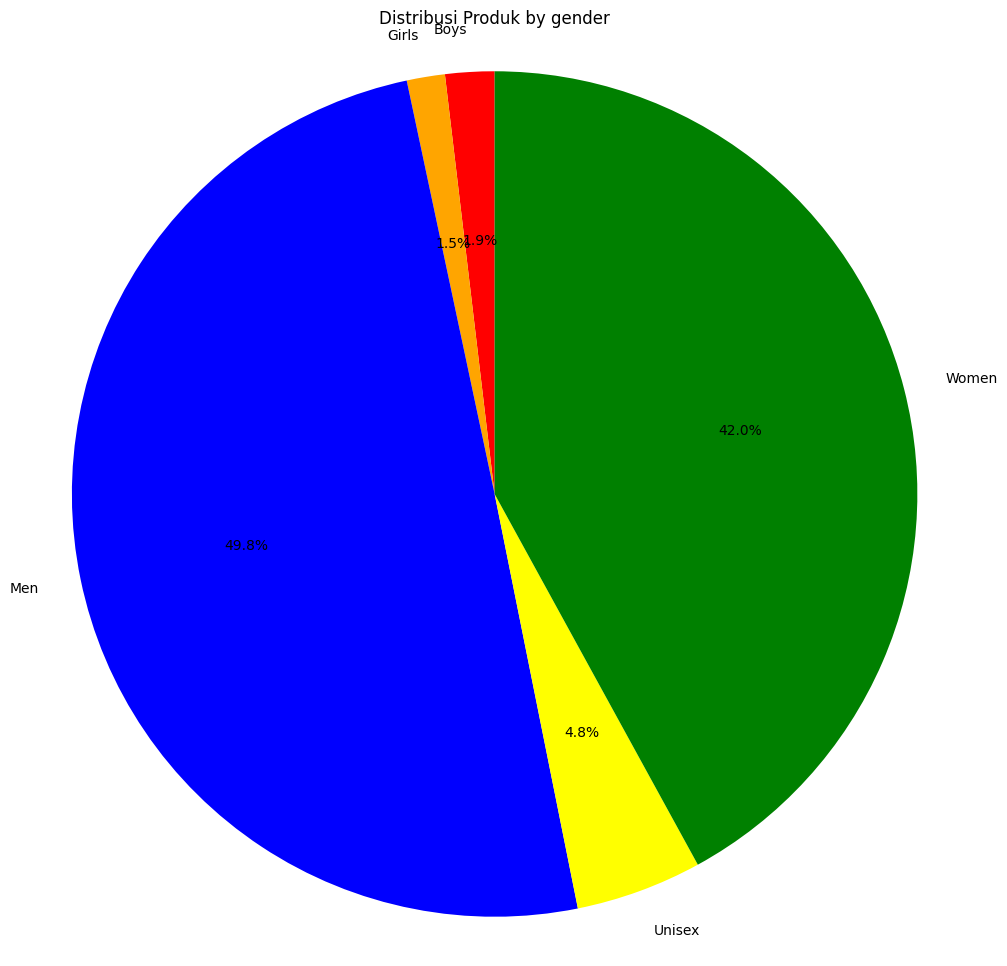

In [ ]:
gender_counts = df['masterCategory'].groupby(df['gender']).count()

# Membuat grafik pie
plt.figure(figsize=(12, 12))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange','blue','yellow','green'])
plt.title('Distribusi Produk by gender')
plt.axis('equal')
plt.show()

Dari data keluaran di atas dapat disimpulkan distribusi product berdasarkan gender tertuju pada gender men lalu disusul dengan women setelah itu gender unisex dan 2 terbawah adalah gender anak laki-laki dan anak perempuan.

## Total product terjual berdasarkan MasterCategory

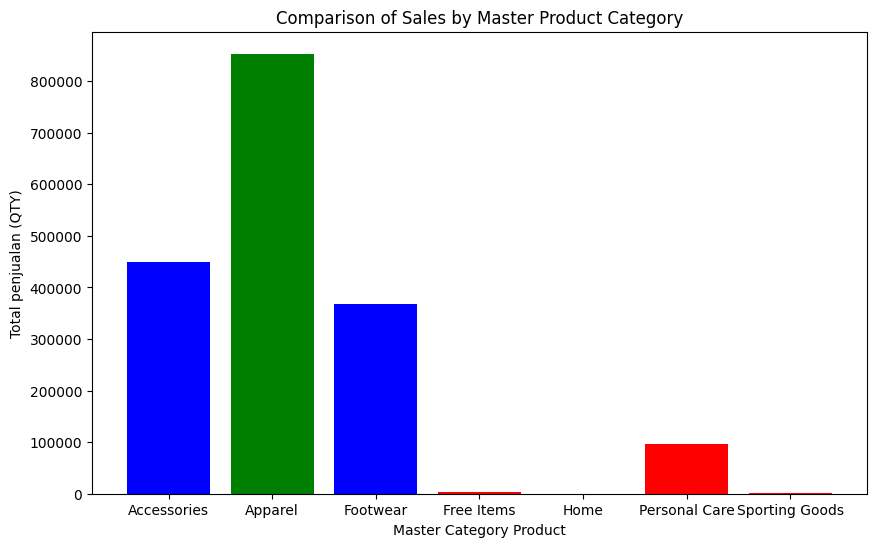

In [ ]:
## Grafik penjualan berdasarkan master category
import matplotlib.pyplot as plt
grouped = df_success.groupby('masterCategory')['quantity'].sum()
# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color=['blue','green','blue','red','red','red','red'])
plt.xlabel('Master Category Product')
plt.ylabel('Total penjualan (QTY)')
plt.title('Comparison of Sales by Master Product Category')
plt.show()

Total produk terbanyak yang terjual berdasarkan master categorynya adalah apparel dengan jumlah quantity 850.000 lalu disusul dengan accesoris, footwear, personal care, free items, sporting goods dan terakhir home

## Total product terjual berdasarkan SubCategory

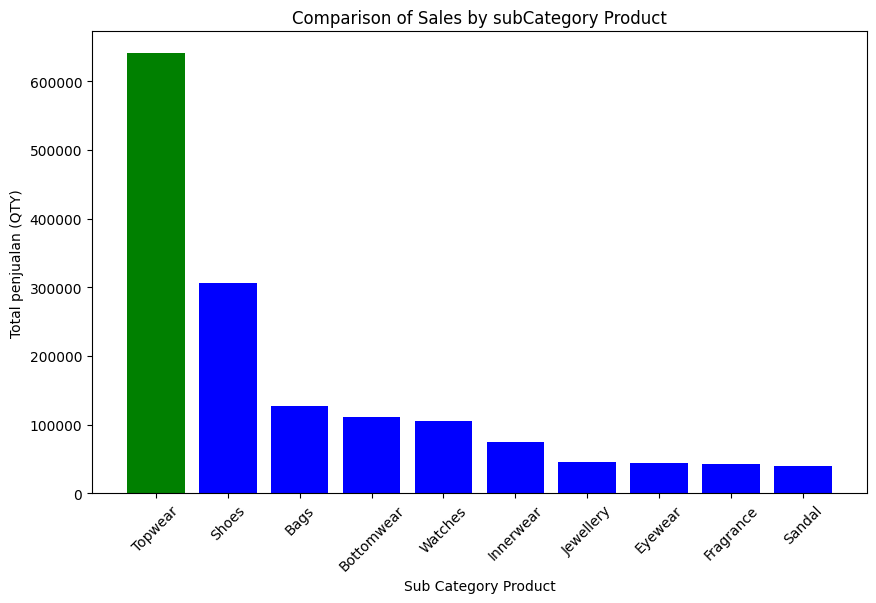

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, Anda telah mengelompokkan data dalam 'grouped' seperti yang Anda tunjukkan
grouped = df.groupby('subCategory')['quantity'].sum()

# Mengambil 10 sub kategori dengan nilai penjualan paling tinggi
top_10_subcategories = grouped.nlargest(10)

# Membuat grafik batang hanya dengan 10 sub kategori teratas
plt.figure(figsize=(10, 6))
plt.bar(top_10_subcategories.index, top_10_subcategories.values, color=['green','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xlabel('Sub Category Product')
plt.ylabel('Total penjualan (QTY)')
plt.title('Comparison of Sales by subCategory Product')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

Total produk terbanyak yang terjual berdasarkan sub categorynya adalah topwear dengan jumlah quantity 650.000 lalu disusul dengan shoes, bags, bottomwear, watches, innerwear, jewellery, eyewear, fragrance, dan sandal.

## Total product terjual berdasarkan ArticleType

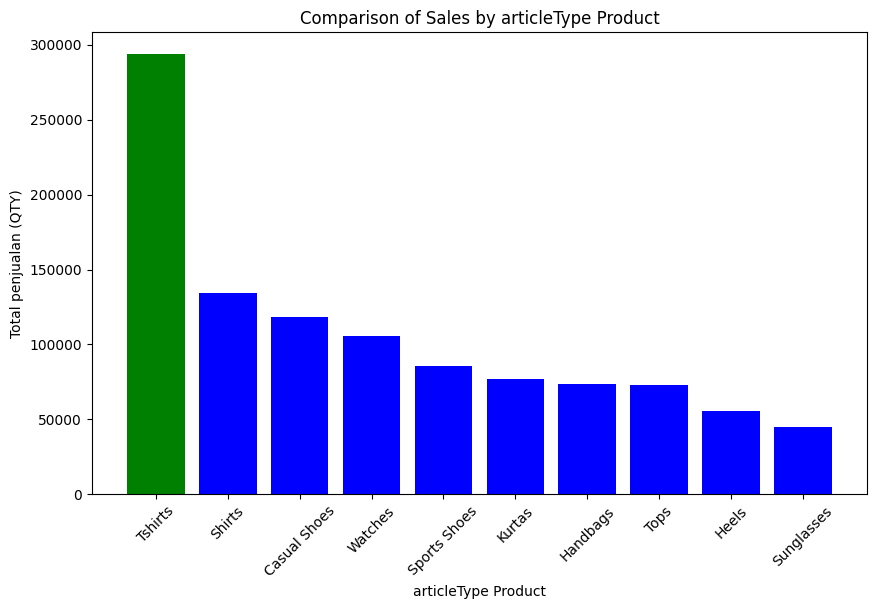

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, Anda telah mengelompokkan data dalam 'grouped' seperti yang Anda tunjukkan
grouped = df.groupby('articleType')['quantity'].sum()

# Mengambil 10 sub kategori dengan nilai penjualan paling tinggi
top_10_subcategories = grouped.nlargest(10)

# Membuat grafik batang hanya dengan 10 sub kategori teratas
plt.figure(figsize=(10, 6))
plt.bar(top_10_subcategories.index, top_10_subcategories.values, color=['green','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xlabel('articleType Product')
plt.ylabel('Total penjualan (QTY)')
plt.title('Comparison of Sales by articleType Product')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

Total produk terbanyak yang terjual berdasarkan articleType adalah Tshirts dengan jumlah quantity 295.000 lalu disusul dengan shirts, casual shoes, watches, sport shoes, kurtas, handbags, tops, heels, dan sunglasses.

## Total product terjual berdasarkan Productame

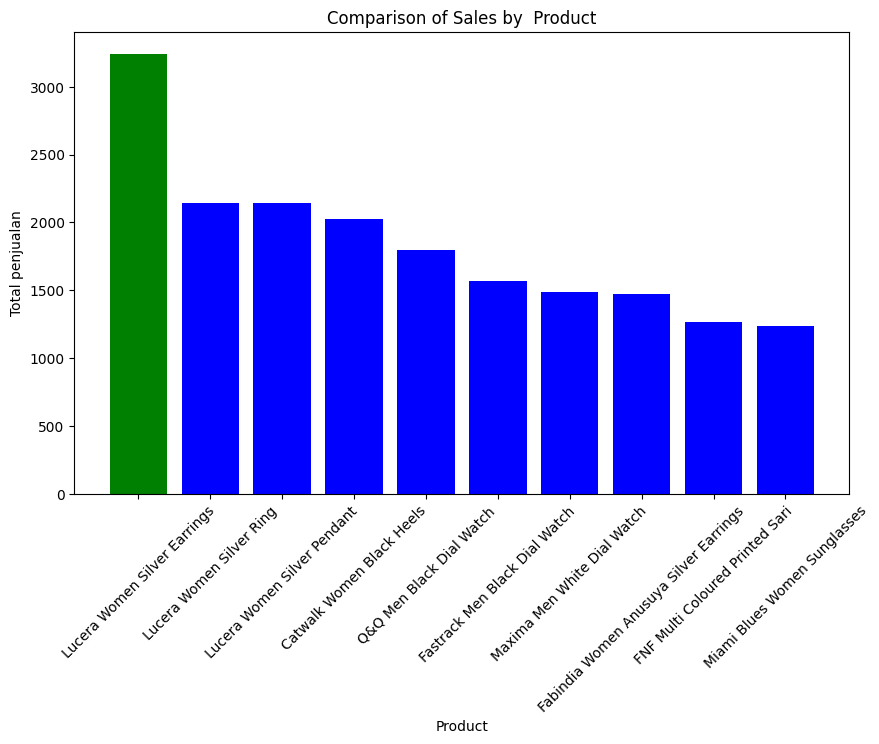

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, Anda telah mengelompokkan data dalam 'grouped' seperti yang Anda tunjukkan
grouped = df_success.groupby('productDisplayName')['quantity'].sum()

# Mengambil 10 sub kategori dengan nilai penjualan paling tinggi
top_10_product = grouped.nlargest(10)

# Membuat grafik batang hanya dengan 10 sub kategori teratas
plt.figure(figsize=(10, 6))
plt.bar(top_10_product.index, top_10_product.values, color=['green','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xlabel('Product')
plt.ylabel('Total penjualan')
plt.title('Comparison of Sales by  Product')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


Total produk terbanyak yang terjual berdasarkan nama produknya adalah Lucera Women Silver Earring dengan jumlah quantity 3400 lalu disusul dengan Lucera Women Silver Ring, Lucera Women Silver Pendant, Catwalk Women Black Heels, Q&Q Men Black Dial Watch, Fastrack Men Black Dial Watch, Maxima Men White Dial Watch, Fabindia Women Anusuya Silver Earrings, Miami Blues Women Sunglasses, dan FNF Multi Coloured Printed Sari.

## Product dengan pendapatan paling banyak

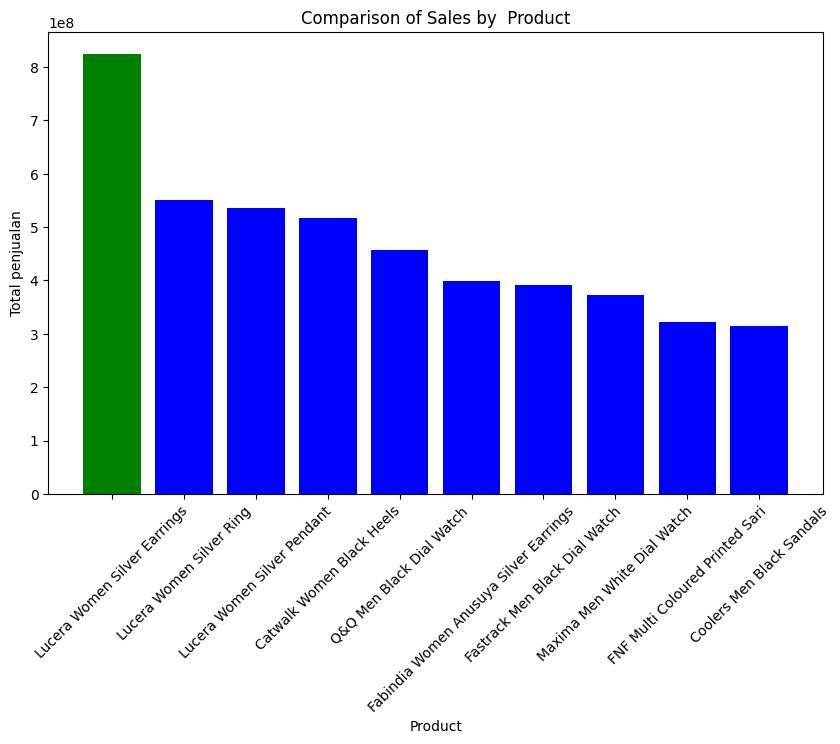

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, Anda telah mengelompokkan data dalam 'grouped' seperti yang Anda tunjukkan
grouped = df_success.groupby('productDisplayName')['real_total_amount'].sum()

# Mengambil 10 sub kategori dengan nilai penjualan paling tinggi
top_10_product_amount= grouped.nlargest(10)

# Membuat grafik batang hanya dengan 10 sub kategori teratas
plt.figure(figsize=(10, 6))
plt.bar(top_10_product_amount.index, top_10_product_amount.values, color=['green','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xlabel('Product')
plt.ylabel('Total penjualan')
plt.title('Comparison of Sales by  Product')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


Total pendapatan terbanyak yang didapat berdasarkan nama produknya adalah Lucera Women Silver Earring dengan jumlah pendapatan 2,9M lalu disusul dengan Catwalk Women Black Heels, Lucera Women Silver Pendant, Lucera Women Silver Ring, Q&Q Men Black Dial Watch, Fastrack Men Black Dial Watch, Maxima Men White Dial Watch, Fabindia Women Anusuya Silver Earrings,FNF Multi Coloured Printed Sari dan Murcia Women Brown Handbag.

## payment menthod yang banyak dilakukan oleh user

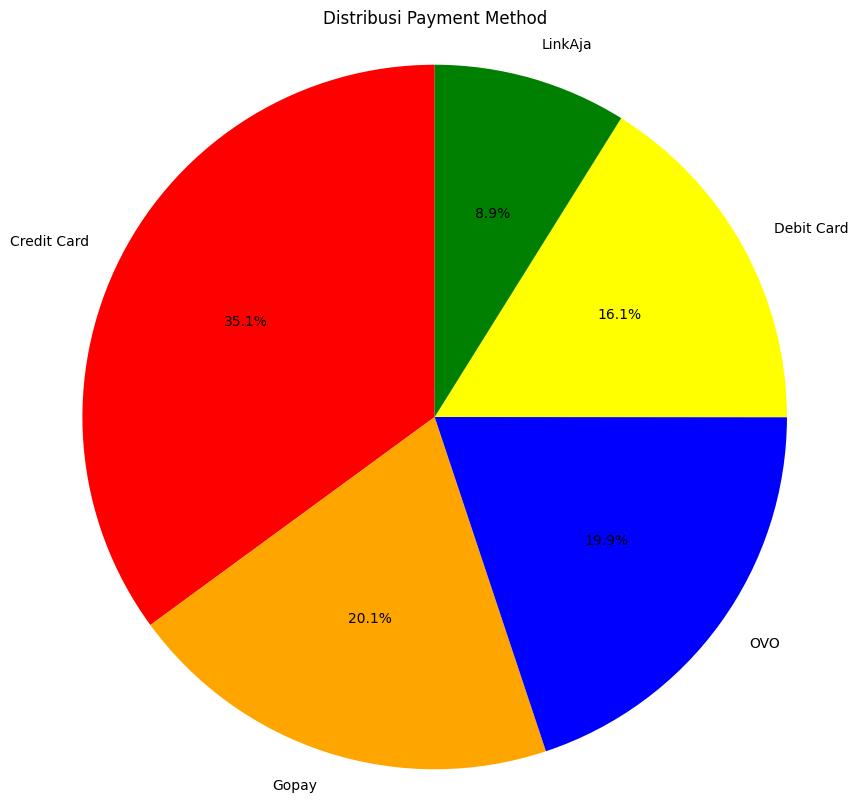

In [ ]:
payment = df_success['payment_method'].value_counts()

# Membuat grafik pie
plt.figure(figsize=(10, 10))
plt.pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange','blue','yellow','green'])
plt.title('Distribusi Payment Method')
plt.axis('equal')
plt.show()

Dari banyaknya payment method dapat di simpulkan bahwa credit card merupakan metode pembayaran yang banyak digunakan oleh user untuk transaksi di e-commerce capstone lalu disusul dengan gopay, ovo, debit card dan yang terakhir link aja.

## Status Transaksi

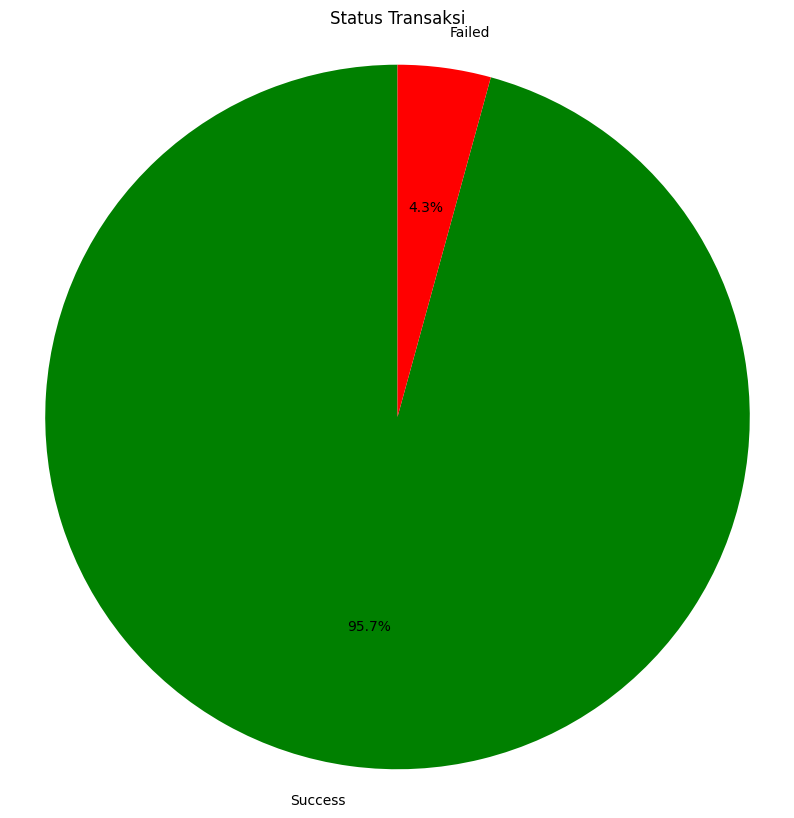

In [ ]:
transaksi = df['payment_status'].value_counts()

# Membuat grafik pie
plt.figure(figsize=(10, 10))
plt.pie(transaksi, labels=transaksi.index, autopct='%1.1f%%', startangle=90, colors=['green','red'])
plt.title('Status Transaksi')
plt.axis('equal')
plt.show()

Status transaksi yang dilakukan user pada e-commerce didominasi dengan success dengan persentase 95.7% yang berarti kemungkinan user gagal transaksi sangat kecil yaitu 4.3%.

## Penggunaan code promo

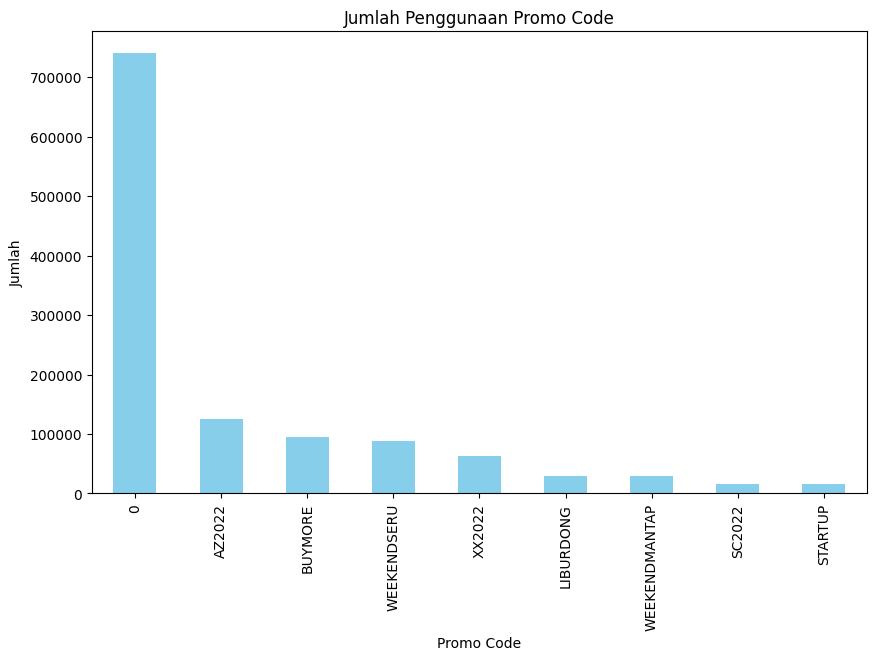

In [ ]:
promo_code_counts = df_success['promo_code'].value_counts()
# Plot bar chart
plt.figure(figsize=(10, 6))
promo_code_counts.plot(kind='bar', color='skyblue')

# Menambahkan label
plt.xlabel('Promo Code')
plt.ylabel('Jumlah')

# Menambahkan judul
plt.title('Jumlah Penggunaan Promo Code')

# Menampilkan bar chart
plt.show()

Sebgaian besar user berbelanja di capstone e-commerce tanpa menggunakan promo yaitu dengan jumlah 780.000 transaksi, disusul menggunakan code promo AZ2022, BUYMORE, WEEKENDSERU, XX2022, LIBURDONG, WEEKENDMANTAP, SC2022 dan STARTUP.

## Rata - rata potonngan yang diberikan dari kode promo

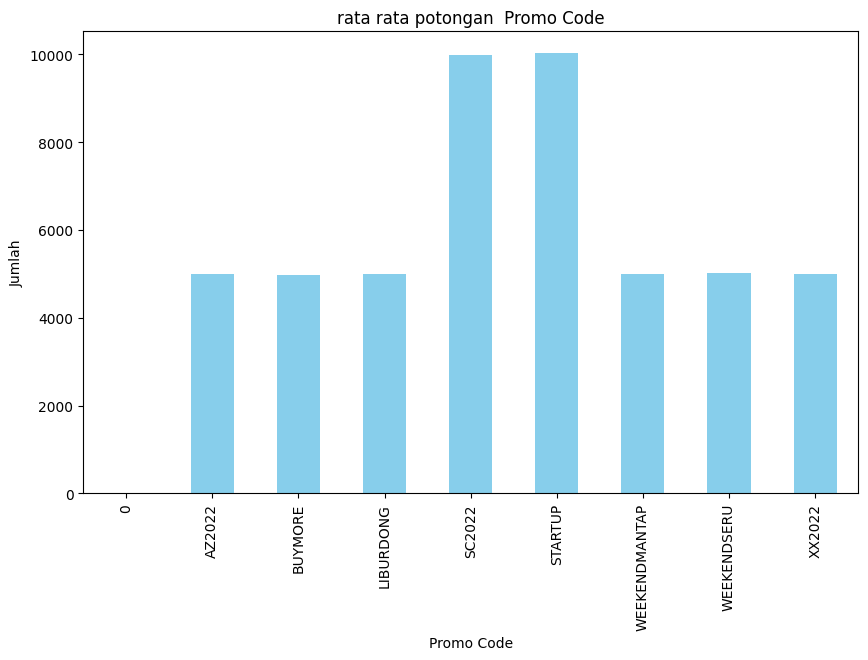

In [ ]:
promo_code_counts =df_success.groupby('promo_code')['promo_amount'].mean()
# Plot bar chart
plt.figure(figsize=(10, 6))
promo_code_counts.plot(kind='bar', color='skyblue')

# Menambahkan label
plt.xlabel('Promo Code')
plt.ylabel('Jumlah')

# Menambahkan judul
plt.title('rata rata potongan  Promo Code')

# Menampilkan bar chart
plt.show()

Rata-rata potongan harga dari promo code yang diberikan e-commerce adalah sebesar 10.000 yaitu pada code promo SC2022 dan STARTUP, dan sisanya dengan potongan rata-rata sebesar 5.000 dengan promo code AZ2022, BUYMORE, LIBURDONG, WEEKENDMANTAP, WEEKENDSERU, dan XX2022.

#Feature Enginer onehot encoding

In [ ]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200444 entries, 0 to 1253965
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   customer_id          1200444 non-null  int64              
 1   productDisplayName   1200444 non-null  object             
 2   masterCategory       1200444 non-null  object             
 3   product_id           1200444 non-null  int64              
 4   created_at           1200444 non-null  datetime64[ns, UTC]
 5   season               1200444 non-null  object             
 6   payment_method       1200444 non-null  object             
 7   payment_status       1200444 non-null  object             
 8   promo_amount         1200444 non-null  int64              
 9   promo_code           1200444 non-null  object             
 10  shipment_fee         1200444 non-null  int64              
 11  shipment_date_limit  1200444 non-null  datetime64[

In [ ]:
##encoding
##onehot encoding
ToEncoding= ['season']
from sklearn.preprocessing import OneHotEncoder
df_success= pd.get_dummies(df_success, columns=ToEncoding, prefix=ToEncoding, dtype=int)

In [ ]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200444 entries, 0 to 1253965
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   customer_id          1200444 non-null  int64              
 1   productDisplayName   1200444 non-null  object             
 2   masterCategory       1200444 non-null  object             
 3   product_id           1200444 non-null  int64              
 4   created_at           1200444 non-null  datetime64[ns, UTC]
 5   payment_method       1200444 non-null  object             
 6   payment_status       1200444 non-null  object             
 7   promo_amount         1200444 non-null  int64              
 8   promo_code           1200444 non-null  object             
 9   shipment_fee         1200444 non-null  int64              
 10  shipment_date_limit  1200444 non-null  datetime64[ns, UTC]
 11  quantity             1200444 non-null  int64      

In [ ]:
## agg dilakukan untuk mendapatkan informasi lebih pada product_id
aggdf = df_success.groupby('product_id', as_index=False).agg({
    'quantity': 'sum',
    'item_price': 'mean',
    'real_total_amount': 'sum',
    'shipment_fee': 'mean',
    'season_Fall' : 'sum',
    'season_Spring' : 'sum',
    'season_Summer' : 'sum',
    'season_Winter' : 'sum',

})

In [ ]:
#add recency feature dibuat untuk mengetahui seberapa sering product dibeli semakin kecil semakin bagus
df_recency = df_success.groupby('product_id',as_index=False)['created_at'].max()
df_recency.columns = ['product_id','last_purchase']
recent_date = df_recency['last_purchase'].max()
df_recency['recency'] = df_recency['last_purchase'].apply(lambda x: (recent_date - x).days)
df_recency

,product_id,last_purchase,recency
0,1163,2022-07-04 04:59:03.182283+00:00,27
1,1164,2022-07-28 05:58:13.123157+00:00,3
2,1165,2022-06-02 03:37:03.949492+00:00,59
3,1525,2022-07-27 00:09:36.561973+00:00,4
4,1526,2022-05-01 16:14:57.019988+00:00,91
...,...,...,...
44419,59995,2022-03-05 09:17:27.992189+00:00,148
44420,59996,2022-07-17 07:36:05.601729+00:00,14
44421,59998,2022-07-24 04:42:41.497058+00:00,7
44422,59999,2022-06-16 06:12:27.467203+00:00,45


In [ ]:
#add recency to df_agg
df_final= aggdf.merge(df_recency[['product_id','recency']], how='inner', on='product_id')

In [ ]:
df_final

,product_id,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency
0,1163,38,247738.407407,9728801,6481.481481,0,0,27,0,27
1,1164,27,235207.285714,6469318,8571.428571,0,0,0,21,3
2,1165,30,253437.689655,7927538,9655.172414,0,0,29,0,59
3,1525,47,269841.935484,13711855,9677.419355,31,0,0,0,4
4,1526,30,249964.583333,8056827,13333.333333,24,0,0,0,91
...,...,...,...,...,...,...,...,...,...,...
44419,59995,26,266591.444444,6308762,10277.777778,18,0,0,0,148
44420,59996,27,269660.222222,7510297,9629.629630,0,0,27,0,14
44421,59998,32,247214.615385,7478717,9230.769231,0,0,0,26,7
44422,59999,31,210652.346154,6648070,7307.692308,0,0,0,26,45


# Cluster

In [ ]:
df_id = df_final.iloc[:,0:1]
df_feature = df_final.iloc[ : ,1:]

In [ ]:
df_feature

,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency
0,38,247738.407407,9728801,6481.481481,0,0,27,0,27
1,27,235207.285714,6469318,8571.428571,0,0,0,21,3
2,30,253437.689655,7927538,9655.172414,0,0,29,0,59
3,47,269841.935484,13711855,9677.419355,31,0,0,0,4
4,30,249964.583333,8056827,13333.333333,24,0,0,0,91
...,...,...,...,...,...,...,...,...,...
44419,26,266591.444444,6308762,10277.777778,18,0,0,0,148
44420,27,269660.222222,7510297,9629.629630,0,0,27,0,14
44421,32,247214.615385,7478717,9230.769231,0,0,0,26,7
44422,31,210652.346154,6648070,7307.692308,0,0,0,26,45


In [ ]:
#scale using scaler to normalize data
import sklearn
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df_feature), columns=df_feature.columns)

In [ ]:
df_std

,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency
0,-0.167494,-0.100866,-0.140251,-1.475718,-0.574307,-0.26325,0.994651,-0.476517,-0.271477
1,-1.148476,-0.672187,-1.190523,-0.339550,-0.574307,-0.26325,-0.934766,1.452352,-0.968601
2,-0.880935,0.158977,-0.720654,0.249611,-0.574307,-0.26325,1.137570,-0.476517,0.658021
3,0.635128,0.906883,1.143171,0.261706,1.991704,-0.26325,-0.934766,-0.476517,-0.939554
4,-0.880935,0.000631,-0.678995,2.249189,1.412282,-0.26325,-0.934766,-0.476517,1.587520
...,...,...,...,...,...,...,...,...,...
44419,-1.237656,0.758686,-1.242257,0.588081,0.915635,-0.26325,-0.934766,-0.476517,3.243190
44420,-1.148476,0.898599,-0.855098,0.235725,-0.574307,-0.26325,0.994651,-0.476517,-0.649086
44421,-0.702575,-0.124747,-0.865274,0.018891,-0.574307,-0.26325,-0.934766,1.911606,-0.852414
44422,-0.791755,-1.791702,-1.132925,-1.026561,-0.574307,-0.26325,-0.934766,1.911606,0.251366


In [ ]:
#train the cluster
from sklearn.cluster import KMeans
X1 = df_std.values
inertia = []
for n in range(1 , 15):
  algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500,random_state= 111) )
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

<Axes: xlabel='k', ylabel='centeroid_distance'>

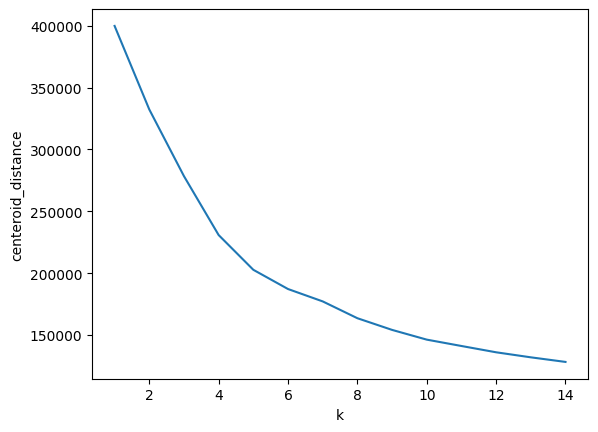

In [ ]:
#plot the elbow
line_test = pd.DataFrame(inertia)
line_test.columns = ['centeroid_distance']
line_test['k'] = [k for k in range(1, 15)]
sns.lineplot(data=line_test, x='k', y='centeroid_distance')

In [ ]:
# train the model with the determined cluster
algorithm = (KMeans(n_clusters = 5,init='k-means++' ,max_iter=300,
                        random_state= 111 ) )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Menghitung Silhouette Index
silhouette_avg = silhouette_score(X1,labels1)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.26260478623631417


In [ ]:
df_feature

,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency
0,38,247738.407407,9728801,6481.481481,0,0,27,0,27
1,27,235207.285714,6469318,8571.428571,0,0,0,21,3
2,30,253437.689655,7927538,9655.172414,0,0,29,0,59
3,47,269841.935484,13711855,9677.419355,31,0,0,0,4
4,30,249964.583333,8056827,13333.333333,24,0,0,0,91
...,...,...,...,...,...,...,...,...,...
44419,26,266591.444444,6308762,10277.777778,18,0,0,0,148
44420,27,269660.222222,7510297,9629.629630,0,0,27,0,14
44421,32,247214.615385,7478717,9230.769231,0,0,0,26,7
44422,31,210652.346154,6648070,7307.692308,0,0,0,26,45


In [ ]:
df_final['cluster'] = labels1
df_final.head()

,product_id,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency,cluster
0,1163,38,247738.407407,9728801,6481.481481,0,0,27,0,27,1
1,1164,27,235207.285714,6469318,8571.428571,0,0,0,21,3,3
2,1165,30,253437.689655,7927538,9655.172414,0,0,29,0,59,1
3,1525,47,269841.935484,13711855,9677.419355,31,0,0,0,4,4
4,1526,30,249964.583333,8056827,13333.333333,24,0,0,0,91,4


In [ ]:
df_final

,product_id,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency,cluster
0,1163,38,247738.407407,9728801,6481.481481,0,0,27,0,27,1
1,1164,27,235207.285714,6469318,8571.428571,0,0,0,21,3,3
2,1165,30,253437.689655,7927538,9655.172414,0,0,29,0,59,1
3,1525,47,269841.935484,13711855,9677.419355,31,0,0,0,4,4
4,1526,30,249964.583333,8056827,13333.333333,24,0,0,0,91,4
...,...,...,...,...,...,...,...,...,...,...,...
44419,59995,26,266591.444444,6308762,10277.777778,18,0,0,0,148,4
44420,59996,27,269660.222222,7510297,9629.629630,0,0,27,0,14,1
44421,59998,32,247214.615385,7478717,9230.769231,0,0,0,26,7,3
44422,59999,31,210652.346154,6648070,7307.692308,0,0,0,26,45,3


In [ ]:
# df_final.to_csv('clusterupdatelagi.csv', index=False)
# from google.colab import files
# files.download('clusterupdatelagi.csv')

In [ ]:
df_normalize = df_std.copy()
df_normalize['cluster'] = labels1
pd.set_option('display.max_columns', None)
aggcluster = df_normalize.groupby('cluster').mean()

In [ ]:
df_normalize

,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency,cluster
0,-0.167494,-0.100866,-0.140251,-1.475718,-0.574307,-0.26325,0.994651,-0.476517,-0.271477,1
1,-1.148476,-0.672187,-1.190523,-0.339550,-0.574307,-0.26325,-0.934766,1.452352,-0.968601,3
2,-0.880935,0.158977,-0.720654,0.249611,-0.574307,-0.26325,1.137570,-0.476517,0.658021,1
3,0.635128,0.906883,1.143171,0.261706,1.991704,-0.26325,-0.934766,-0.476517,-0.939554,4
4,-0.880935,0.000631,-0.678995,2.249189,1.412282,-0.26325,-0.934766,-0.476517,1.587520,4
...,...,...,...,...,...,...,...,...,...,...
44419,-1.237656,0.758686,-1.242257,0.588081,0.915635,-0.26325,-0.934766,-0.476517,3.243190,4
44420,-1.148476,0.898599,-0.855098,0.235725,-0.574307,-0.26325,0.994651,-0.476517,-0.649086,1
44421,-0.702575,-0.124747,-0.865274,0.018891,-0.574307,-0.26325,-0.934766,1.911606,-0.852414,3
44422,-0.791755,-1.791702,-1.132925,-1.026561,-0.574307,-0.26325,-0.934766,1.911606,0.251366,3


In [ ]:
# df_normalize.to_csv('df_normalize.csv', index=False)
# from google.colab import files
# files.download('df_normalize.csv')

In [ ]:
df_final.describe()

,product_id,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency,cluster
count,44424.000000,44424.000000,44424.000000,4.442400e+04,44424.000000,44424.000000,44424.00000,44424.000000,44424.000000,44424.000000,44424.000000
mean,29696.334301,39.878151,249950.751981,1.016406e+07,9196.020010,6.938209,1.81528,13.080992,5.187939,36.346187,2.259544
std,17049.490518,11.213378,21933.809144,3.103501e+06,1839.489992,12.081143,6.89573,13.994023,10.887334,34.427550,1.308462
min,1163.000000,10.000000,162453.181818,2.578646e+06,3437.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,14768.750000,32.000000,235007.891705,7.981552e+06,7894.736842,0.000000,0.00000,0.000000,0.000000,12.000000,1.000000
50%,28618.500000,39.000000,249326.974537,9.744072e+06,9038.461538,0.000000,0.00000,0.000000,0.000000,27.000000,2.000000
75%,44683.250000,47.000000,264143.574074,1.188269e+07,10322.580645,18.000000,0.00000,27.000000,0.000000,51.000000,4.000000
max,60000.000000,114.000000,374575.733333,3.409829e+07,19523.809524,47.000000,48.00000,50.000000,47.000000,380.000000,4.000000


In [ ]:
aggcluster

,quantity,item_price,real_total_amount,shipment_fee,season_Fall,season_Spring,season_Summer,season_Winter,recency
cluster,,,,,,,,,
0,0.003891,-0.018574,-0.002782,-0.014069,-0.574307,3.660050,-0.934766,-0.476517,-0.015428
1,-0.608914,-0.147612,-0.618231,-0.004340,-0.567689,-0.262725,0.820508,-0.470707,0.126891
2,1.001966,0.251628,1.035422,0.021708,-0.553786,-0.263250,1.237841,-0.471823,-0.209282
3,0.007856,0.018990,0.006131,0.000987,-0.574307,-0.263250,-0.934766,2.016882,-0.008077
4,-0.002974,-0.014677,-0.012996,-0.007552,1.662879,-0.263250,-0.934766,-0.476517,0.009643


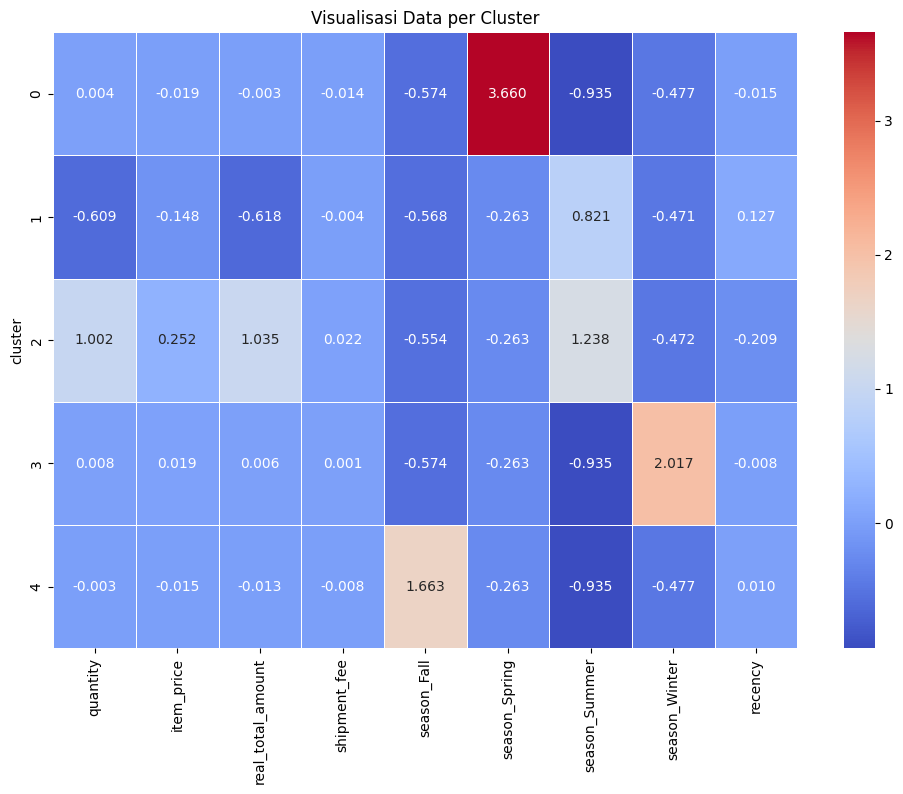

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame contoh
data = {
    'cluster': [0, 1, 2, 3, 4],
    'quantity': [0.003891, -0.608914, 1.001966, 0.007856, -0.002974],
    'item_price': [-0.018574, -0.147612, 0.251628, 0.018990, -0.014677],
    'real_total_amount': [-0.002782, -0.618231, 1.035422, 0.006131, -0.012996],
    'shipment_fee': [-0.014069, -0.004340, 0.021708, 0.000987, -0.007552],
    'season_Fall': [-0.574307, -0.567689, -0.553786, -0.574307, 1.662879],
    'season_Spring': [3.660050, -0.262725, -0.263250, -0.263250, -0.263250],
    'season_Summer': [-0.934766, 0.820508, 1.237841, -0.934766, -0.934766],
    'season_Winter': [-0.476517, -0.470707, -0.471823, 2.016882, -0.476517],
    'recency': [-0.015428, 0.126891, -0.209282, -0.008077, 0.009643],
}

df = pd.DataFrame(data)
df.set_index('cluster', inplace=True)  # Set kolom 'cluster' sebagai indeks

# Membuat visualisasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Visualisasi Data per Cluster')
plt.show()


In [ ]:
# df_final.to_csv('clusterupdatelagi.csv', index=False)
# from google.colab import files
# # files.download('clusterupdatelagi.csv')

## Prespektif


1.  cluster 0 : jumlah frekuensi quantity sedikit diatas rata-rata, harga item sedikit dibawah rata-rata, memiliki total amont dibawah rata-rata, biaya pengiriman murah, didominasi product season Spring, tergolong product yang sering laku.
<hr>
2. cluster 1 : jumlah frekuensi quantitty paling rendah, harga itemprice paling murah, memiliki total amount paling rendah, biaya pengiriman tergolong murah, lumayan didominasi product season summer, dan  tergolong product yang paling jarang laku.
<hr>
3. cluster 2 : memiliki frekuensi quantity yang tertinggi, harga itemprice tergolong harga paling tinggi, memiliki pendapatan total amount tertinggi, biaya pengiriman diatas rata-rata, didominasi product season summer, product sering dibeli oleh user(paling laku).
<hr>
4. cluster 3 : memiliki frekuensi quantity sedikit diatas rata-rata, harga itemprice diatas rata-rata,memiliki total_amount yang tinggi juga, biaya pengiriman sedikit diatsa rata-rata didoinasi product season winter, product tergolong sering laku.
<hr>
5. cluster 4 :  memiliki frekuensi quantity tergolong rendah, harga item price juga tergolong murah,memiliki total amount yang tergolong rendah, biaya pengiriman tergolong murah,didominasi productseason fall, product bisa dikatakan jarang laku.
<hr>


# Forcasting

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1254585 non-null  datetime64[ns, UTC]
 1   customer_id             1254585 non-null  int64              
 2   booking_id              1254585 non-null  object             
 3   session_id              1254585 non-null  object             
 4   payment_method          1254585 non-null  object             
 5   payment_status          1254585 non-null  object             
 6   promo_amount            1254585 non-null  int64              
 7   promo_code              1254585 non-null  object             
 8   shipment_fee            1254585 non-null  int64              
 9   shipment_date_limit     1254585 non-null  datetime64[ns, UTC]
 10  shipment_location_lat   1254585 non-null  float64            
 11  shipment_lo

In [ ]:
##ubah type data
transactions['product_id'] = transactions['product_id'].astype('category')

In [ ]:
transactions['product_id'].nunique()

44446

In [ ]:
transactions= transactions[transactions['payment_status'] == 'Success']

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1201035 non-null  datetime64[ns, UTC]
 1   customer_id             1201035 non-null  int64              
 2   booking_id              1201035 non-null  object             
 3   session_id              1201035 non-null  object             
 4   payment_method          1201035 non-null  object             
 5   payment_status          1201035 non-null  object             
 6   promo_amount            1201035 non-null  int64              
 7   promo_code              1201035 non-null  object             
 8   shipment_fee            1201035 non-null  int64              
 9   shipment_date_limit     1201035 non-null  datetime64[ns, UTC]
 10  shipment_location_lat   1201035 non-null  float64            
 11  shipment_lo

In [ ]:
## FE MEMBUAT KOLOM DATE
transactions['date'] = transactions['created_at']

<ipython-input-91-d32d8bebb0ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['date'] = transactions['created_at']


In [ ]:
## FE memilih kolom untuk forcasting
df = transactions[['date','product_id','quantity']]

In [ ]:
df.groupby(df['date'].dt.to_period('Q'))['quantity'].agg('sum')

<ipython-input-93-6cd3bdca6632>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(df['date'].dt.to_period('Q'))['quantity'].agg('sum')


date
2016Q2         3
2016Q3      3279
2016Q4      6849
2017Q1     10343
2017Q2     14182
2017Q3     21300
2017Q4     25479
2018Q1     28710
2018Q2     34256
2018Q3     41910
2018Q4     47161
2019Q1     49980
2019Q2     56609
2019Q3     65910
2019Q4     69577
2020Q1     76834
2020Q2     83174
2020Q3     95665
2020Q4    105345
2021Q1    113166
2021Q2    123175
2021Q3    141202
2021Q4    155936
2022Q1    167875
2022Q2    182069
2022Q3     52420
Freq: Q-DEC, Name: quantity, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1254584
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   date        1201035 non-null  datetime64[ns, UTC]
 1   product_id  1201035 non-null  category           
 2   quantity    1201035 non-null  int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(1)
memory usage: 33.4 MB


In [ ]:
##EDA UNTUK MENGETAHUI data date berdasarkan quaerter
pd.PeriodIndex(df['date'] ,freq='Q')

PeriodIndex(['2018Q3', '2018Q3', '2018Q3', '2018Q4', '2018Q4', '2019Q1',
             '2019Q1', '2019Q2', '2019Q2', '2019Q3',
             ...
             '2022Q2', '2022Q3', '2016Q3', '2016Q3', '2016Q3', '2020Q4',
             '2021Q4', '2021Q4', '2019Q4', '2019Q4'],
            dtype='period[Q-DEC]', name='date', length=1201035)

In [ ]:
#FE membuat kolom mount date sama quarter date
df['month_date'] = df.date.dt.to_period('M').dt.to_timestamp('M')
df['quarter_date'] = df.date.dt.to_period('Q').dt.to_timestamp('Q')

<ipython-input-96-97b4ca7db7b5>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_date'] = df.date.dt.to_period('M').dt.to_timestamp('M')
<ipython-input-96-97b4ca7db7b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_date'] = df.date.dt.to_period('M').dt.to_timestamp('M')
<ipython-input-96-97b4ca7db7b5>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter_date'] = df.date.dt.to_period('Q').dt.to_timestamp('Q')
<ipython-input-96-97b4ca7db7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
df

,date,product_id,quantity,month_date,quarter_date
0,2018-07-29 15:22:01.458193+00:00,54728,1,2018-07-31,2018-09-30
1,2018-07-30 12:40:22.365620+00:00,16193,1,2018-07-31,2018-09-30
2,2018-09-15 11:51:17.365620+00:00,53686,4,2018-09-30,2018-09-30
3,2018-11-01 11:23:48.365620+00:00,20228,1,2018-11-30,2018-12-31
4,2018-12-18 11:20:30.365620+00:00,55220,1,2018-12-31,2018-12-31
...,...,...,...,...,...
1254579,2020-11-12 18:19:20.074873+00:00,42915,1,2020-11-30,2020-12-31
1254581,2021-12-09 07:35:18.222046+00:00,19394,1,2021-12-31,2021-12-31
1254582,2021-12-11 01:20:36.944593+00:00,13079,4,2021-12-31,2021-12-31
1254583,2019-12-18 11:01:09.623382+00:00,11312,1,2019-12-31,2019-12-31


In [ ]:
transactions[(transactions['product_id']==54728)][['created_at','quantity','product_id']].sort_values('created_at')

,created_at,quantity,product_id
918356,2018-04-29 17:45:42.869653+00:00,3,54728
0,2018-07-29 15:22:01.458193+00:00,1,54728
534019,2018-10-07 09:23:06.739792+00:00,1,54728
72180,2019-02-05 08:29:50.613535+00:00,1,54728
1237876,2019-03-17 17:53:48.516933+00:00,1,54728
501920,2019-11-23 07:13:41.662927+00:00,3,54728
304917,2020-03-20 14:14:16.529607+00:00,1,54728
55958,2020-06-04 14:54:13.726119+00:00,1,54728
929539,2020-07-13 12:47:35.224895+00:00,1,54728
123972,2020-11-04 14:20:44.351064+00:00,8,54728


In [ ]:
#aggregate data based on date category
df = df.groupby(['month_date', 'product_id']).agg({
    'quantity': 'sum'
}).reset_index().sort_values(by='product_id')

In [ ]:
df[df['product_id'] == 54728]

,month_date,product_id,quantity
2351579,2020-10-31,54728,0
973753,2018-03-31,54728,0
3240499,2022-06-30,54728,0
618185,2017-07-31,54728,0
2396025,2020-11-30,54728,8
...,...,...,...
1507105,2019-03-31,54728,1
307063,2016-12-31,54728,0
3196053,2022-05-31,54728,0
1640443,2019-06-30,54728,0


In [ ]:
forecast_transactions = df
forecast_transactions.rename(columns = {'month_date' : 'ds', 'product_id' : 'unique_id', 'quantity' : 'y'}, inplace = True)

In [ ]:
groups_by_ticker = forecast_transactions.groupby('unique_id')
groups_by_ticker.groups.keys()

dict_keys([1163, 1164, 1165, 1525, 1526, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1563, 1565, 1566, 1567, 1569, 1570, 1571, 1572, 1573, 1575, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1587, 1588, 1590, 1591, 1592, 1594, 1595, 1596, 1597, 1598, 1599, 1603, 1604, 1605, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1634, 1635, 1636, 1637, 1638, 1641, 1642, 1644, 1645, 1646, 1647, 1648, 1649, 1651, 1653, 1654, 1656, 1657, 1658, 1662, 1668, 1670, 1671, 1673, 1678, 1689, 1697, 1727, 1728, 1729, 1730, 1731, 1752, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1762, 1763, 1764, 1765, 1766, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,

In [ ]:
# # install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=903409ddfedb13b6bac3ffb1f3148aeb1c1552b44cb2370b36639291065a8dab
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## USE PROPHET

In [ ]:
from prophet import Prophet

def train_and_forecast(group):
  # Initiate the model
  m = Prophet()

  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods = 6, freq='M')
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['unique_id'] = group['unique_id'].iloc[0]

  # Return the forecasted results
  return forecast[['ds', 'unique_id', 'yhat', 'yhat_upper', 'yhat_lower']]

In [ ]:
# Convert the pandas dataframe into a spark dataframe
sdf = spark.createDataFrame(forecast_transactions)
# Define the restult schema
result_schema =StructType([
  StructField('ds',DateType()),
  StructField('unique_id',IntegerType()),
  StructField('yhat',FloatType()),
  StructField('yhat_upper',FloatType()),
  StructField('yhat_lower',FloatType())
  ])
# Train and forecast by ticker
spark_forecast = sdf.groupBy('unique_id').applyInPandas(train_and_forecast, schema=result_schema)
# Take a look at the resultsx

In [ ]:
from pyspark.sql.functions import col

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("example").getOrCreate()

In [ ]:
filtered_df = spark_forecast.filter(col("ds") > "2022-07-31")

# Menampilkan hasil
filtered_df.show(3)

+----------+---------+---------+----------+-----------+
|        ds|unique_id|     yhat|yhat_upper| yhat_lower|
+----------+---------+---------+----------+-----------+
|2022-08-31|     1163| 1.556997|  2.603678| 0.42726108|
|2022-09-30|     1163|0.9660578| 2.1675134|-0.06337433|
|2022-10-31|     1163|1.2815274|  2.336789| 0.20758283|
+----------+---------+---------+----------+-----------+
only showing top 3 rows



In [ ]:
# df_result = spark_forecast.toPandas()


In [ ]:
result = pd.read_csv('drive/MyDrive/Dataset-Capstone/df_result (1).csv')

In [ ]:
predict = result.round()

In [ ]:
predict

,ds,unique_id,yhat,yhat_upper,yhat_lower
0,2016-06-30,1526,-1.0,0.0,-1.0
1,2016-07-31,1526,-0.0,1.0,-1.0
2,2016-08-31,1526,-0.0,0.0,-1.0
3,2016-09-30,1526,-0.0,1.0,-1.0
4,2016-10-31,1526,-1.0,0.0,-1.0
...,...,...,...,...,...
3555675,2022-09-30,59987,1.0,1.0,-0.0
3555676,2022-10-31,59987,1.0,1.0,-0.0
3555677,2022-11-30,59987,1.0,2.0,0.0
3555678,2022-12-31,59987,1.0,2.0,1.0


In [ ]:
predict['yhat']= predict['yhat'].astype(int)
predict['yhat_upper']= predict['yhat_upper'].astype(int)
predict['yhat_lower']= predict['yhat_lower'].astype(int)

In [ ]:
predict_mae = predict[predict['ds']<='2022-07-31']

In [ ]:
## berfungsinuntuk nilai yang < 1 maka diubah ke 0
def roundfor(data):
  if data < 1 :
    return 0
  else:
    return data

data = predict
data['yhat'] = data['yhat'].apply(roundfor).astype(int)
data['yhat_upper'] = data['yhat_upper'].apply(roundfor).astype(int)
data['yhat_lower'] = data['yhat_lower'].apply(roundfor).astype(int)

### Evaluasi model prophet

In [ ]:
predict_mae

,ds,unique_id,yhat,yhat_upper,yhat_lower
0,2016-06-30,1526,-1,0,-1
1,2016-07-31,1526,0,1,-1
2,2016-08-31,1526,0,0,-1
3,2016-09-30,1526,0,1,-1
4,2016-10-31,1526,-1,0,-1
...,...,...,...,...,...
3555669,2022-03-31,59987,1,1,0
3555670,2022-04-30,59987,1,2,0
3555671,2022-05-31,59987,1,1,0
3555672,2022-06-30,59987,1,1,0


In [ ]:
## berfungsinuntuk nilai yang < 1 maka diubah ke 0
def roundfor(data):
  if data < 1 :
    return 0
  else:
    return data

data = predict_mae
data['yhat'] = data['yhat'].apply(roundfor).astype(int)
data['yhat_upper'] = data['yhat_upper'].apply(roundfor).astype(int)
data['yhat_lower'] = data['yhat_lower'].apply(roundfor).astype(int)

<ipython-input-110-8dc1f4743ee7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = data['yhat'].apply(roundfor).astype(int)
<ipython-input-110-8dc1f4743ee7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat_upper'] = data['yhat_upper'].apply(roundfor).astype(int)
<ipython-input-110-8dc1f4743ee7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np

def evaluate_forecast(y, yhat):
    results = pd.DataFrame({'r2_score': r2_score(y, yhat)}, index=[0])
    results['mean absolute error'] = mean_absolute_error(y, yhat)
    results['median absolute error'] = median_absolute_error(y, yhat)
    results['Mean Squared Error'] = mean_squared_error(y, yhat)
    results['Root Mean Squared Error'] = np.sqrt(results['Mean Squared Error'])
    results['Mean absolute percentage error (MAPE)'] = mean_absolute_percentage_error(y, yhat)

    return results

In [ ]:
evalusi_prophet = evaluate_forecast(forecast_transactions['y'], predict_mae['yhat'])

In [ ]:
evalusi_prophet

,r2_score,mean absolute error,median absolute error,Mean Squared Error,Root Mean Squared Error,Mean absolute percentage error (MAPE)
0,-0.33058,0.845636,1.0,2.502423,1.581905,1.902976e+15


## USE XGBOOST

In [ ]:
df= pd.read_csv('drive/MyDrive/Dataset-Capstone/df_result (1).csv')

In [ ]:
df_round = df.round()
df_round['yhat']= df_round['yhat'].astype(int)
df_round['yhat_upper']= df_round['yhat_upper'].astype(int)
df_round['yhat_lower']= df_round['yhat_lower'].astype(int)
df_round

,ds,unique_id,yhat,yhat_upper,yhat_lower
0,2016-06-30,1526,-1,0,-1
1,2016-07-31,1526,0,1,-1
2,2016-08-31,1526,0,0,-1
3,2016-09-30,1526,0,1,-1
4,2016-10-31,1526,-1,0,-1
...,...,...,...,...,...
3555675,2022-09-30,59987,1,1,0
3555676,2022-10-31,59987,1,1,0
3555677,2022-11-30,59987,1,2,0
3555678,2022-12-31,59987,1,2,1


In [ ]:
def roundfor(data):
  if data < 1 :
    return 0
  else:
    return data

data = df_round
data['yhat'] = data['yhat'].apply(roundfor).astype(int)
data['yhat_upper'] = data['yhat_upper'].apply(roundfor).astype(int)
data['yhat_lower'] = data['yhat_lower'].apply(roundfor).astype(int)
data

,ds,unique_id,yhat,yhat_upper,yhat_lower
0,2016-06-30,1526,0,0,0
1,2016-07-31,1526,0,1,0
2,2016-08-31,1526,0,0,0
3,2016-09-30,1526,0,1,0
4,2016-10-31,1526,0,0,0
...,...,...,...,...,...
3555675,2022-09-30,59987,1,1,0
3555676,2022-10-31,59987,1,1,0
3555677,2022-11-30,59987,1,2,0
3555678,2022-12-31,59987,1,2,1


In [ ]:
## spliting
train = df_round[df_round['ds']< '2020-06-30']
valid = df_round[(df_round['ds']>= '2020-06-30') & (df_round['ds']< '2022-07-31')]
test =df_round[df_round['ds']>'2022-07-31']


In [ ]:
#drop yhat from data test
test.drop(['yhat'], axis = 1, inplace = True)

<ipython-input-118-5a4731813dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['yhat'], axis = 1, inplace = True)


In [ ]:
#drop ds from data train valid and test
train.drop(['ds'], axis = 1, inplace = True)
valid.drop(['ds'], axis = 1, inplace = True)
test.drop(['ds'], axis = 1, inplace = True)

<ipython-input-119-46b68e231777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['ds'], axis = 1, inplace = True)
<ipython-input-119-46b68e231777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop(['ds'], axis = 1, inplace = True)
<ipython-input-119-46b68e231777>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['ds'], axis = 1, inplace = True)


In [ ]:
# Spliting X,Y to data train dan valid and test
x_train = train.drop('yhat', axis = 1)
y_train = np.log1p(train['yhat'])
x_valid = valid.drop('yhat', axis = 1)
y_valid = np.log1p(valid['yhat'])
x_test = test

In [ ]:
## crate parameter xgb
xgb_params = {
    'predictor': 'gpu_predictor', 'verbosity': 2,
    'objective': 'reg:squarederror', 'eval_metric': 'rmse',
    'random_state': 42, 'learning_rate': 0.01,
    'subsample': 0.8, 'colsample_bytree': 0.8,
    'reg_alpha': 1.0, 'reg_lambda': 0.1,
    'min_child_weight': 40, }

In [ ]:
## training model
import xgboost as xgb
model = xgb.XGBRegressor(**xgb_params)
model = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:46:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = model.predict(x_valid)

In [ ]:
evaluate_xgb = pd.DataFrame()
evaluate_xgb['y_valid'] = y_valid
evaluate_xgb['y_pred'] = y_pred
evaluate_xgb[evaluate_xgb['y_pred'] < 1] = 0
evaluate_xgb.head()

,y_valid,y_pred
48,0.0,0.0
49,0.0,0.0
50,0.0,0.0
51,0.0,0.0
52,0.0,0.0


In [ ]:
y_hat = model.predict(x_test)
x_test ['ypred']= y_hat
x_test

<ipython-input-125-f30e974c6114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test ['ypred']= y_hat


,unique_id,yhat_upper,yhat_lower,ypred
74,1526,2,0,0.262670
75,1526,2,0,0.262670
76,1526,2,0,0.262670
77,1526,2,1,0.550593
78,1526,2,0,0.262670
...,...,...,...,...
3555675,59987,1,0,0.120779
3555676,59987,1,0,0.120779
3555677,59987,2,0,0.271800
3555678,59987,2,1,0.559717


In [ ]:
#rounding result
xgb_forcastt = x_test.round().astype(int)

In [ ]:
xgb_forcastt

,unique_id,yhat_upper,yhat_lower,ypred
74,1526,2,0,0
75,1526,2,0,0
76,1526,2,0,0
77,1526,2,1,1
78,1526,2,0,0
...,...,...,...,...
3555675,59987,1,0,0
3555676,59987,1,0,0
3555677,59987,2,0,0
3555678,59987,2,1,1


### Evaluasi Model

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),}, index=[0])
    results['mean absolute error'] = mean_absolute_error(y, pred)
    results['median absolute error'] = median_absolute_error(y, pred)
    results['Mean Squared Error'] = mean_squared_error(y, pred)
    results['Root Mean Squared Error'] = np.sqrt(results['Mean Squared Error'])
    results['Mean absolute percentage error (MAPE)'] = mean_absolute_percentage_error(y, pred)
    return results

In [ ]:
evaluasi_xgb = evaluate_forecast(evaluate_xgb['y_valid'], evaluate_xgb['y_pred'])

In [ ]:
evaluasi_xgb

,r2_score,mean absolute error,median absolute error,Mean Squared Error,Root Mean Squared Error,Mean absolute percentage error (MAPE)
0,0.888238,0.004458,0.0,0.002583,0.050827,0.002595
